# Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [4]:
dataset = pd.read_csv('Social Media Data for DSBA.csv')

# Moving the dependent coloum 'preferred_devices' to last coloum

In [5]:
column_to_move = 'preferred_device'
new_df = dataset.drop(column_to_move, axis=1)
new_df[column_to_move] = dataset[column_to_move]
dataset = new_df

# Droping and converting some data for featuring

In [6]:
dataset = dataset.dropna(subset=['preferred_device'])
dataset = dataset[dataset['yearly_avg_Outstation_checkins'] != '*']

mapping = {'Three': 3}
dataset['member_in_family'] = dataset['member_in_family'].map(mapping)

# Spliting data to independent and dependent varibles

In [7]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Encoding the variables

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,6,10,12])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

# Replacing nan's with the mean

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:-1])
X[:, 0:-1] = imputer.transform(X[:, 0:-1])

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the variables for test and train

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train

array([[1.0, 0.0, 0.0, ..., 2.0, 1.0, 16],
       [1.0, 0.0, 0.0, ..., 3.0, 0.0, 8],
       [1.0, 0.0, 0.0, ..., 3.0, 0.0, 16],
       ...,
       [1.0, 0.0, 1.0, ..., 4.0, 0.0, 18],
       [1.0, 0.0, 0.0, ..., 2.0, 0.0, 6],
       [1.0, 0.0, 0.0, ..., 2.0, 1.0, 6]], dtype=object)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = classifier.predict(X_test)

# Confusion Matrix and Accuracy Score

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7068670994192006

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,   29],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   79],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   38],
       [   0,    0,    0,    0,    0,    0,    0,  268,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  171,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0, 1054,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,  268],
       [   0,    0,    0,    0,    0,    0,    0,    2,    0, 1015]],
      dtype=int64)

# Ploting the Confusion Matrix

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

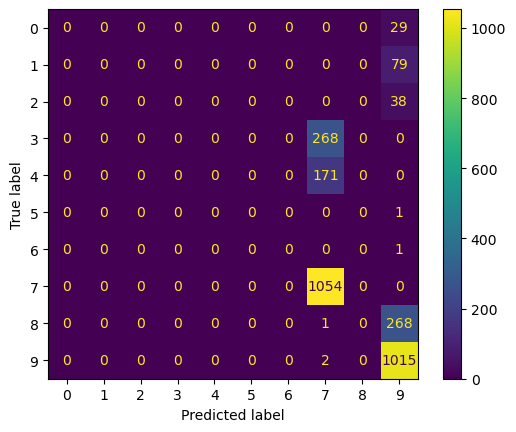

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_sisp=ConfusionMatrixDisplay(cm)
cm_sisp.plot()

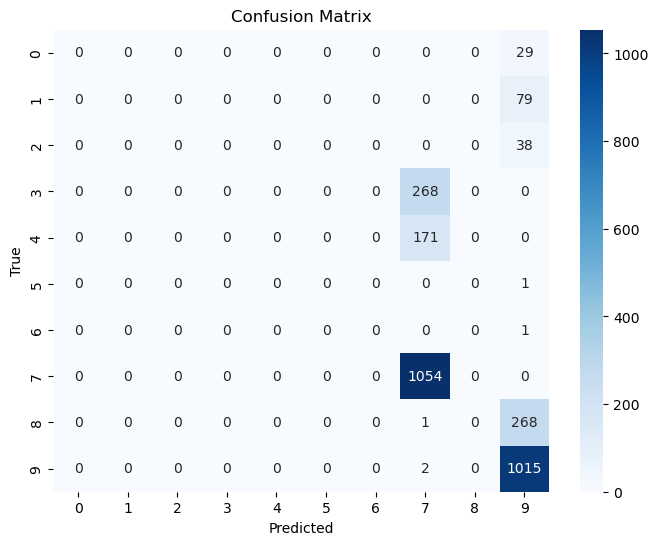

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00       268
           4       0.00      0.00      0.00       171
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.70      1.00      0.83      1054
           8       0.00      0.00      0.00       269
           9       0.71      1.00      0.83      1017

    accuracy                           0.71      2927
   macro avg       0.14      0.20      0.17      2927
weighted avg       0.50      0.71      0.59      2927



C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='weighted')

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5001513872049097

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)